In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df['MA_3_floor_check'] = df.iloc[:,1].rolling(window=3).mean().apply(np.floor)

In [4]:
df.dropna(inplace=True)

In [5]:
df.head()

,Month,Passengers,MA_3_floor_check
2,1949-03,132,120.0
3,1949-04,129,126.0
4,1949-05,121,127.0
5,1949-06,135,128.0
6,1949-07,148,134.0


<AxesSubplot:>

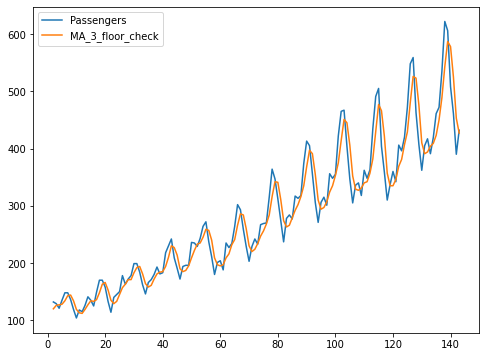

In [6]:
df[['Passengers','MA_3_floor_check']].plot(figsize=(8,6))

In [7]:
def train_test_split1(data,perc):
    data = data.values
    n = int(len(data)*(1-perc))
    return data[:n],data[n:]
    

In [8]:
train,test = train_test_split1(df,0.2)

In [9]:
df['Month'] = pd.to_datetime(df['Month'])
df =  df.set_index(['Month'])

In [10]:
df.head()

,Passengers,MA_3_floor_check
Month,,
1949-03-01,132,120.0
1949-04-01,129,126.0
1949-05-01,121,127.0
1949-06-01,135,128.0
1949-07-01,148,134.0


In [11]:
df.head()

,Passengers,MA_3_floor_check
Month,,
1949-03-01,132,120.0
1949-04-01,129,126.0
1949-05-01,121,127.0
1949-06-01,135,128.0
1949-07-01,148,134.0


In [12]:
X = train[:,-1].reshape(-1,1)

In [13]:
Y = train[:,:-1]

In [14]:
Y.shape

(113, 2)

In [20]:
X.shape

(113, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state = 0)
model_fit1 = model1.fit(X,Y)

In [ ]:
test[0]

In [ ]:
val= np.array(test[0,0]).reshape(1,-1)
print(val)

In [ ]:
predictions = model_fit1.predict(val)

In [ ]:
np.floor(predictions)

In [ ]:
predictions[0]

In [ ]:
def rf_predict(train,val):
    train = np.array(train)
    X = train[:,-1].reshape(-1,1)
    y =  train[:,:-1]
    model1 = RandomForestRegressor(random_state = 0)
    model_fit1 = model1.fit(X,Y)
    
    val = np.array(val).reshape(1,-1)
    pred = model_fit1.predict(val)
    return pred[0]

In [ ]:
rf_predict(train,test[0,1])


In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
cols = ['MA_3_floor_check','Passengers']

In [ ]:
df =df[cols]

In [ ]:
df.head()

In [ ]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

def xgb_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
    model.fit(X, y)

    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

def validate(data, perc):
    predictions = []

    train, test = train_test_split(data, perc)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]

        pred = xgb_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions

In [168]:
%%time
rmse, y, pred = validate(df, 0.2)

print(rmse)

C:\Users\mayuri.mhetre\Anaconda3\lib\site-packages\xgboost\data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


62.74843946271935
Wall time: 16.3 s


In [190]:
compare_df = pd.DataFrame(list(zip(y.tolist(),np.floor(pred))), columns=['actual','predicted'])

<AxesSubplot:>

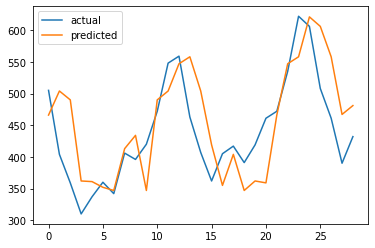

In [192]:
compare_df.plot()

In [194]:
from sklearn.metrics import r2_score
r2 = r2_score(compare_df['actual'],compare_df['predicted'])

In [195]:
r2

0.36134063230198754

In [197]:
###https://www.youtube.com/watch?v=4rikgkt4IcU

In [200]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

def rfr_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(random_state = 0)
    model.fit(X, y)

    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

def validate(data, perc):
    predictions = []

    train, test = train_test_split(data, perc)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]

        pred = rfr_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions



rmse, y, pred = validate(df, 0.2)

print(rmse)

56.571283266553735


In [201]:
compare_df1 = pd.DataFrame(list(zip(y.tolist(),np.floor(pred))), columns=['actual','predicted'])
from sklearn.metrics import r2_score
r2 = r2_score(compare_df1['actual'],compare_df1['predicted'])

In [202]:
r2

0.4780495282706475

<AxesSubplot:>

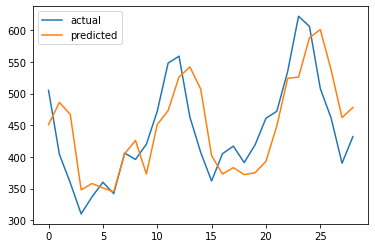

In [203]:
compare_df1.plot()

### NOTE:
### Xgboost gives                               r2 score : 32%
### Randome forest regressor gives r2 score --- 47%

In [17]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.8,adjust=False).mean().apply(np.floor) 

In [18]:
df.head()

,Passengers,MA_3_floor_check,EWM_method1
Month,,,
1949-03-01,132,120.0,132.0
1949-04-01,129,126.0,129.0
1949-05-01,121,127.0,122.0
1949-06-01,135,128.0,132.0
1949-07-01,148,134.0,144.0


MSE:  53.96478873239437
r2: 0.9961734920972414


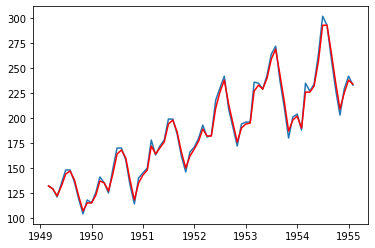

In [204]:
df['EWM_method1'] = df['Passengers'].ewm(alpha=0.8,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method1']))

r2 = r2_score(df['Passengers'],df['EWM_method1'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method1'][0:72], color='red')
plt.show()

In [205]:
df.head()

,MA_3_floor_check,Passengers,EWM_method1
Month,,,
1949-03-01,120.0,132,132.0
1949-04-01,126.0,129,129.0
1949-05-01,127.0,121,122.0
1949-06-01,128.0,135,132.0
1949-07-01,134.0,148,144.0


In [207]:
df_new = df.drop(['MA_3_floor_check'],axis=1,inplace=True)

In [212]:
cols = ['EWM_method1','Passengers']
df= df[cols]

In [215]:
df.head() ## changed the columns order

,EWM_method1,Passengers
Month,,
1949-03-01,132.0,132
1949-04-01,129.0,129
1949-05-01,122.0,121
1949-06-01,132.0,135
1949-07-01,144.0,148


In [216]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

def rfr_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(random_state = 0)
    model.fit(X, y)

    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

def validate(data, perc):
    predictions = []

    train, test = train_test_split(data, perc)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]

        pred = rfr_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions



rmse, y, pred = validate(df, 0.2)

print(rmse)

22.153585531648044


r squared error 0.9196973203092556


<AxesSubplot:>

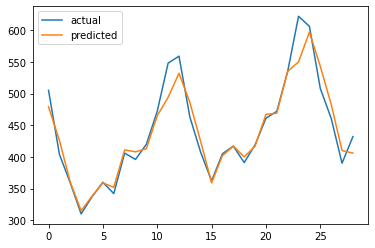

In [217]:
compare_df1 = pd.DataFrame(list(zip(y.tolist(),np.floor(pred))), columns=['actual','predicted'])
from sklearn.metrics import r2_score
r2 = r2_score(compare_df1['actual'],compare_df1['predicted'])
print("r squared error",r2)
compare_df1.plot()

### So, combination of exponential moving average and random forest regresor gives r2_score = 91%
### Train data = legth :113 and test data : length 29

MSE:  129.08333333333334
r2: 0.990968123831459


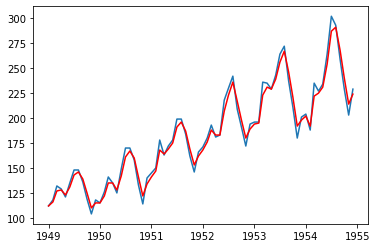

In [230]:
df['EWM_method2'] = df['Passengers'].ewm(alpha=0.7,adjust=False).mean().apply(np.floor) 
def mse(actual, pred): 
    actual = actual.to_numpy()
    pred = pred.to_numpy()
    return np.square(np.subtract(actual,pred)).mean() 
print("MSE: ",mse(df['Passengers'],df['EWM_method2']))

r2 = r2_score(df['Passengers'],df['EWM_method2'])
print("r2:" , r2)

plt.plot(df['Passengers'][0:72])
plt.plot(df['EWM_method2'][0:72], color='red')
plt.show()

In [231]:
cols = ['EWM_method2','Passengers']
df= df[cols]

In [248]:
df.head()

,EWM_method2,Passengers
Month,,
1949-01-01,112.0,112
1949-02-01,116.0,118
1949-03-01,127.0,132
1949-04-01,128.0,129
1949-05-01,123.0,121


In [263]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

def rfr_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(random_state = 0)
    model.fit(X, y)

    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

def validate(data, perc):
    predictions = []

    train, test = train_test_split(data, perc)

    history = [x for x in train]
    
    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]

        pred = rfr_predict(history, test_X[0])
        predictions.append(np.floor(pred))

        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions



rmse, y, pred = validate(df, 0.2)

print(rmse)

24.188911680269165


r squared error 0.9041519506898881


<AxesSubplot:>

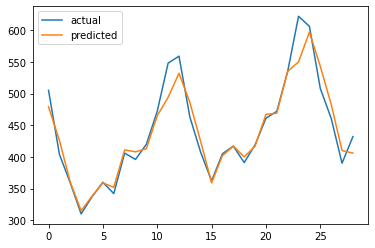

In [264]:
compare_df2 = pd.DataFrame(list(zip(y.tolist(),np.floor(pred))), columns=['actual','predicted'])
from sklearn.metrics import r2_score
r2 = r2_score(compare_df2['actual'],compare_df2['predicted'])
print("r squared error",r2)
compare_df1.plot()

### So, combination of exponential moving average(EWM) and random forest regresor gives r2_score = 90%
### Train data = legth :113 and test data : length 29

https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

https://youtu.be/4rikgkt4IcU